<a href="https://colab.research.google.com/github/diegoeer/Artificial-Intelligence/blob/main/AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2: Processing Datasets in Python**

TEAM MEMBERS
*   Erick Alejandro Cuéllar Sánchez 2055305
*   Rosa Nelly Castillo Villa 1996381
*   Diego Eduardo Elizondo Robledo 2003500
*   Hanna Valeria Salinas García 2049054
*   Leyda Verónica Sifuentes Pinal 2062247


Class: Artificial Intelligence//Group:003//LMV N1

Ing. Daniel Isaías López Páez.

1. In this step we are going to import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

2. Now we import the clinical data and display the first rows and columns.

In [4]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. Now we explore the dataset by generating descriptive statistics, checking for null values, and identifying any zero values in important columns.

In [6]:
df.describe()

print("Null values per column:")
print(df.isnull().sum())


cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_check:
    print(f"Zeros in {col}: {np.sum(df[col] == 0)}")

Null values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Zeros in Glucose: 5
Zeros in BloodPressure: 35
Zeros in SkinThickness: 227
Zeros in Insulin: 374
Zeros in BMI: 11


4. Now we clean the dataset by replacing zero values in important columns with the median of each column to ensure the data is consistent and ready for analysis.

In [7]:
for col in cols_to_check:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

for col in cols_to_check:
    print(f"Zeros in {col} after cleaning: {np.sum(df[col] == 0)}")

Zeros in Glucose after cleaning: 0
Zeros in BloodPressure after cleaning: 0
Zeros in SkinThickness after cleaning: 0
Zeros in Insulin after cleaning: 0
Zeros in BMI after cleaning: 0


5. Now we normalize the numerical columns using Min-Max scaling to transform the data into a uniform range, which improves the performance of machine learning models.

In [10]:
scaler = MinMaxScaler()

num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


**EXTRA:** Here I wanted to see how the graphs work, and I clicked a button. It looked nice, so I decided to keep it. 😃

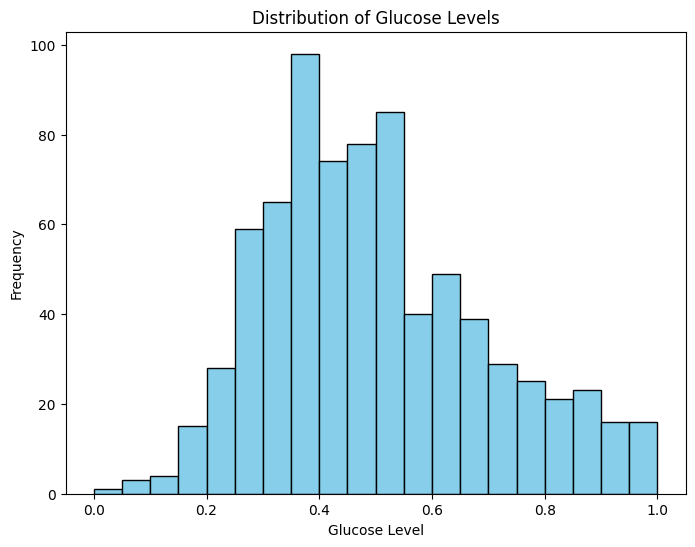

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels')
plt.show()

7. Now we create visualizations to better understand the dataset, including histograms, boxplots, scatter plots, and bar charts, to analyze distributions, correlations, and potential outliers.

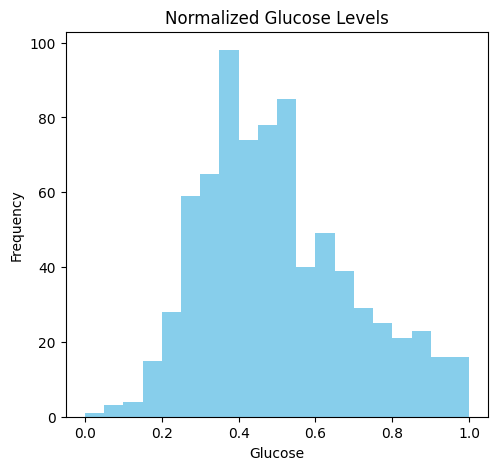

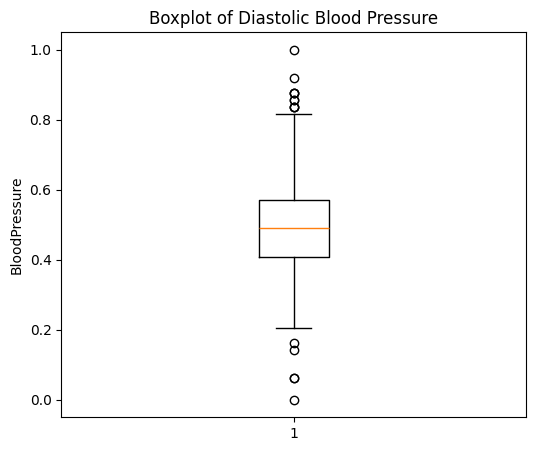

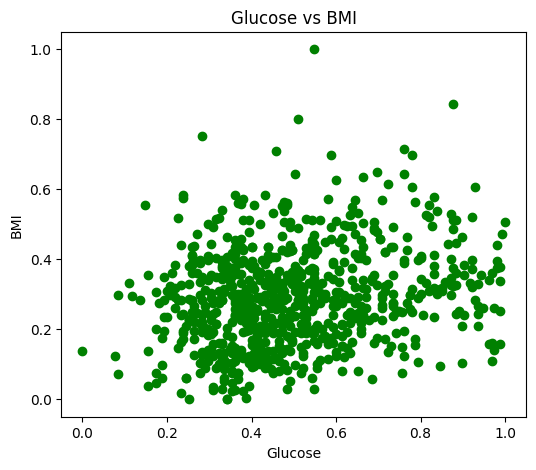

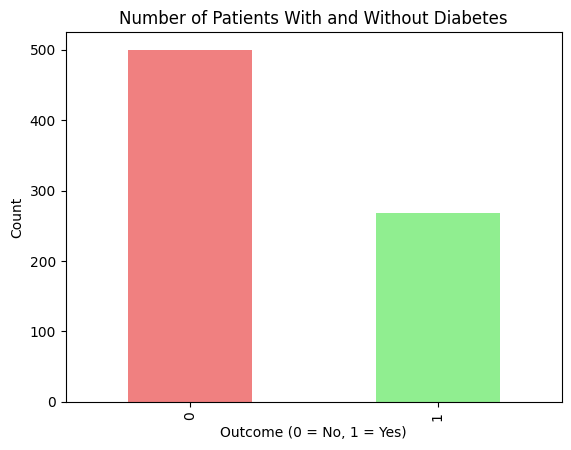

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['Glucose'], bins=20, color='skyblue')
plt.title('Normalized Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')

plt.figure(figsize=(6,5))
plt.boxplot(df['BloodPressure'])
plt.title('Boxplot of Diastolic Blood Pressure')
plt.ylabel('BloodPressure')
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(df['Glucose'], df['BMI'], color='green')
plt.title('Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

df['Outcome'].value_counts().plot(kind='bar', color=['lightcoral','lightgreen'])
plt.title('Number of Patients With and Without Diabetes')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# **QUESTIONS**

**1. What impact do missing values have on data analysis?** Missing values can affect the results of an analysis because they reduce the amount of information available. If they are not handled properly, they can lead to incorrect conclusions or less accurate predictions in machine learning models.

**2. How can we detect and handle outliers in biomedical datasets?**
Outliers can be detected using visualizations like boxplots or histograms, or by using statistical methods such as Z-scores. Once detected, outliers can be removed or replaced with appropriate values, depending on the context of the data.

**3. What are some common causes of missing or incorrect data in biomedical studies?**
Common causes include mistakes during data entry, equipment errors during measurements, patients skipping tests, or incomplete medical records.

**4. How does normalizing data improve the performance of Machine Learning models?**
Normalizing data scales all numerical values to a similar range, which prevents some features from having more influence than others. This helps machine learning models learn more effectively and produce more accurate results.

**5. Why is visualizing data an important step before applying Machine Learning models?**
Visualizing data allows us to understand patterns, trends, and possible errors in the dataset. It also helps identify outliers or inconsistencies that could affect the performance of a model.

**6. Why is preprocessing critical when working with medical datasets?**
Preprocessing ensures the data is clean, consistent, and ready for analysis. In medical datasets, this step is essential because inaccurate data could lead to wrong predictions or interpretations.

**7. What ethical concerns should be considered when handling patient data?**
Patient data must be kept private and confidential. It should be anonymized, handled responsibly, and comply with legal regulations to avoid misuse or bias.